Sample Dataset:
   SquareFootage  Bedrooms  Bathrooms          Price
0    1998.528380         1   2.007598  544558.825216
1    3842.285781         1   3.475322  872526.562588
2    3142.380614         1   2.089178  799013.967586
3    2715.707149         5   1.102684  775071.279623
4    1299.259649         4   3.491964  386150.225876

Model Evaluation:
Mean Squared Error (MSE): 2734409825.31
R-squared (R^2): 0.93


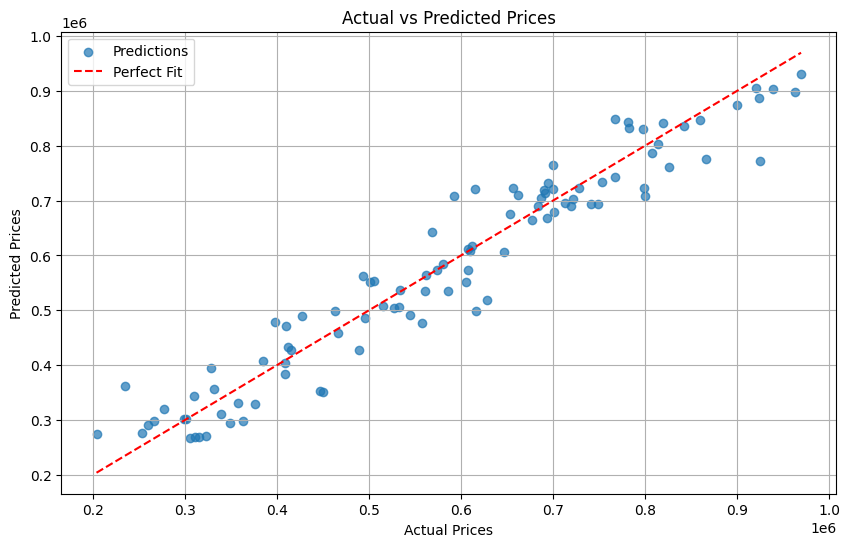


Predicted Prices for New Houses:
House 1: $406,512.11
House 2: $630,032.00
House 3: $793,510.29


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Task 1: Generate Synthetic Dataset
np.random.seed(42)

# Create features: SquareFootage, Bedrooms, Bathrooms
n_samples = 500
square_footage = np.random.uniform(800, 4000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.uniform(1, 4, n_samples)

# Generate target variable (Price) with some noise
price = (
    50000 + 200 * square_footage + 10000 * bedrooms + 15000 * bathrooms + np.random.normal(0, 50000, n_samples)
)

# Create DataFrame
data = pd.DataFrame({
    'SquareFootage': square_footage,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Price': price
})

print("Sample Dataset:")
print(data.head())

# Task 2: Data Preprocessing
X = data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Model Implementation
model = LinearRegression()
model.fit(X_train, y_train)

# Task 4: Make Predictions
y_pred = model.predict(X_test)

# Task 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Task 6: Visualize Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

# Task 7: Predict Prices for New Data
new_houses = pd.DataFrame({
    'SquareFootage': [1500, 2500, 3200],
    'Bedrooms': [3, 4, 5],
    'Bathrooms': [2, 3, 4]
})
new_predictions = model.predict(new_houses)

print("\nPredicted Prices for New Houses:")
for i, price in enumerate(new_predictions, 1):
    print(f"House {i}: ${price:,.2f}")
